In [1]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from torchvision import transforms
from torchvision.datasets import MNIST


os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Use only the first GPU

tf = transforms.Compose([transforms.ToTensor()]) # mnist is already normalised 0 to 1
train_dataset = MNIST("/data/edherron/data/MNIST", train=True, download=False, transform=tf)
val_dataset = MNIST("/data/edherron/data/MNIST", train=False, download=False, transform=tf)

In [2]:
# Initialize a list to count occurrences of each digit (0-9)
class_counts = [0] * 10

# Iterate through the dataset and count each label
for _, label in train_dataset:
    class_counts[label] += 1

# Print the count for each class
for i, count in enumerate(class_counts):
    print(f"Count for digit {i}: {count}")

Count for digit 0: 5923
Count for digit 1: 6742
Count for digit 2: 5958
Count for digit 3: 6131
Count for digit 4: 5842
Count for digit 5: 5421
Count for digit 6: 5918
Count for digit 7: 6265
Count for digit 8: 5851
Count for digit 9: 5949


In [3]:
print(class_counts[4])

5842


In [4]:
# Constants
NUM_CLASSES = 10  # There are 10 digits (0-9)

# Count for the digit '4' (already provided)
num_fours = 5842

# Initialize the training dataset array
# Shape: [number of '4's, 10 classes, 1, 28, 28]
train = np.zeros((num_fours, NUM_CLASSES, 1, 28, 28), dtype=np.float32)

# To track the count of each digit stored in the array
digit_counts = [0] * NUM_CLASSES

# Iterate through the dataset and populate the 'train' array
for image, label in train_dataset:
    if digit_counts[label] < num_fours:
        # Store the image in the array under the corresponding class index
        train[digit_counts[label], label, 0] = image.numpy()
        digit_counts[label] += 1


In [5]:
print(train.shape)

(5842, 10, 1, 28, 28)


In [8]:
np.savez('./chain_flow_mnist.npz',train)

In [9]:
x = np.load('./chain_flow_mnist.npz')['arr_0']

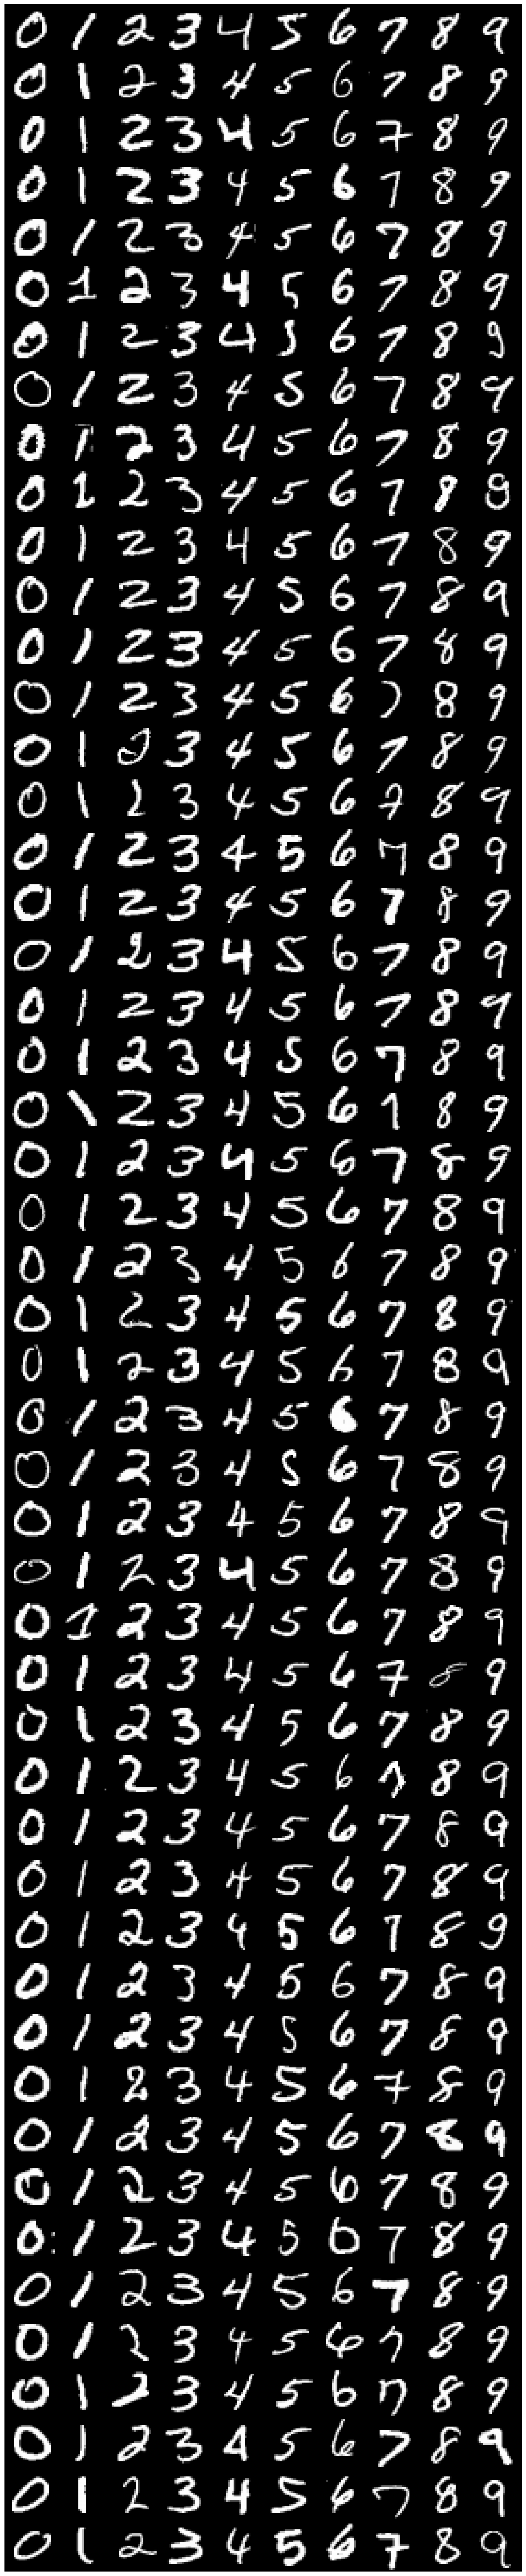

In [10]:
# Set the dimensions of the plot grid
rows, cols = 50, 10

# Create a figure with a specified size
fig, axarr = plt.subplots(rows, cols, figsize=(15, 75))

# Iterate through the grid and place images
for i in range(rows):
    for j in range(cols):
        axarr[i, j].imshow(x[i, j, 0], cmap='gray', aspect='auto')
        axarr[i, j].axis('off')  # Turn off axis

plt.subplots_adjust(wspace=0, hspace=0)  # Adjust the spacing between plots
plt.show()

In [11]:
import torch
from torch.utils import data

class CFDataset(data.Dataset):
    """
    Class to read the numpy dataset for the microstructure
    """
    def __init__(self, data_path='./chain_flow_mnist.npz'):
        self.trajectory = np.load(data_path)['arr_0']

    def __len__(self):
        return self.trajectory.shape[0]

    def __getitem__(self, index):
        return torch.FloatTensor(self.trajectory[index])

In [14]:
data = CFDataset()
loader = torch.utils.data.DataLoader(data, batch_size=32, shuffle=True, num_workers=1)

In [17]:
for batch in loader:
    b = batch.numpy()
    print(b.shape)
    break

(32, 10, 1, 28, 28)


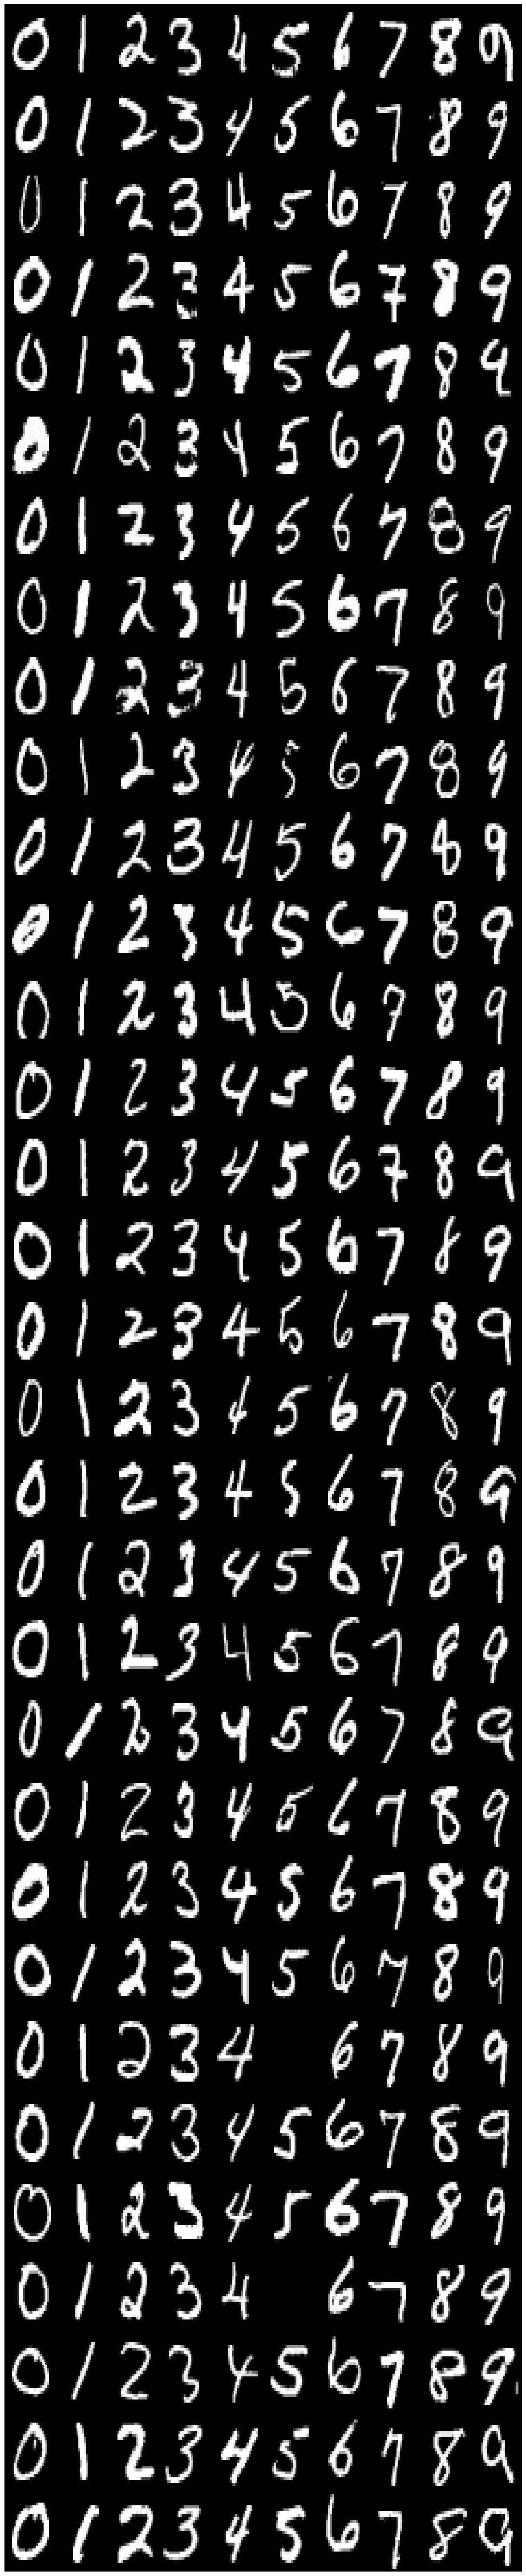

In [18]:
# Set the dimensions of the plot grid
rows, cols = 32, 10

# Create a figure with a specified size
fig, axarr = plt.subplots(rows, cols, figsize=(15, 75))

# Iterate through the grid and place images
for i in range(rows):
    for j in range(cols):
        axarr[i, j].imshow(b[i, j, 0], cmap='gray', aspect='auto')
        axarr[i, j].axis('off')  # Turn off axis

plt.subplots_adjust(wspace=0, hspace=0)  # Adjust the spacing between plots
plt.show()